# *Machine learning* et malédiction de la dimension

Quelques liens pour plus de détails :
* [Overfitting](https://github.com/maximiliense/lmpirp/blob/main/Notes/Overfitting.pdf)
* [KNN](https://github.com/maximiliense/lmpirp/blob/main/Notes/KNN.pdf)

**Objectif :** Cette séquence a pour objectif d'introduire les bases du *machine learning* illustrées via quelques algorithmes particuliers. Il s'agit de sensibiliser à l'idée de classification, régression, supervisé ou non supervisé, à la notion de sur-apprentissage ainsi qu'à la malédiction de la dimension.

Des approfondissements et d'autres modèles seront présentés au travers des différentes séquences qui composent ce cours.

## I. Introduction

Imaginons que nous souhaitions construire une application qui prendrait en entrée une image de chien ou de chat et doive prédire laquelle des deux espèces est représentée. Imaginons encore une application qui prendrait en entrée un mail qu'elle classifierait comme SPAM ou NONSPAM. Supposons qu'il existe deux catégories de clients qu'on ne connait pas *a priori* et que l'entreprise souhaite prédire pour chacun des clients sa catégorie. On peut vouloir prédire la température qu'il fera demain à partir de données relevées aujourd'hui.

Une constante est partagée par l'ensemble de ces scénarios. Il y a tout d'abord une donnée d'entrée plus ou moins complexe et structurée. On notera $\mathcal{X}$ l'espace auquel elle appartient. Ensuite, à partir de cette donnée, l'objectif est de faire une prédiction. Notons $\mathcal{Y}$ l'espace auquel appartient cette prédiction. On appelle ça aussi nos labels ou nos variables à expliquer. Notre objectif, en tant que *machine learner* est de construire une fonction $h:\mathcal{X}\mapsto\mathcal{Y}$ qui aura de *bonnes performances* "en production", c'est-à-dire sur des données nouvelles que nous n'avons jamais vu (i.e. on ne veut pas prédire la météo d'hier à partir d'avant hier, mais bien de demain à partir d'aujourd'hui). 

Deux types d'apprentissage sont généralement opposés : l'apprentissage supervisé (AS) et non-supervisé (ANS).

### A. L'apprentissage supervisé

L'apprentissage supervisé part du principe que (1) nos labels (i.e. l'espace $\mathcal{Y}$) est bien défini et (2) que nous avons accès à des données associant des éléments de $\mathcal{X}$ à leur label $\mathcal{Y}$.

On parlera de problème de régression si par exemple $\mathcal{Y}\subseteq\mathbb{R}$ ou de problème de classification si $\mathcal{Y}=\{1, \ldots, C\}$ où l'ordre n'est pas important. Par exemple, prédire la température est un problème de régression alors que prédire si la photo représente un chien ou un chat est un problème de classification.

A fortiori, toutes les observations dans $\mathcal{X}$ ne sont pas nécessairement équiprobables. Certains clients ont peut-être, par exemple, un profil plus commun que d'autres. Afin de pouvoir définir plus rigoureusement ce qu'on entend pas *bonnes performances*, notons $X\in\mathcal{X}$ une variable aléatoire qui décrit nos données observées et $Y\in\mathcal{Y}$ la variable aléatoire associée à nos labels. Assez naïvement, notons $\mathbb{P}$ la loi de notre couple $X,Y$ :

$$X, Y\sim \mathbb{P}.$$

Notons $r:\mathcal{Y}\times\mathcal{Y}\rightarrow\mathbb{R}^+$ une mesure d'erreur, un risque élémentaire. On a par exemple, dans le cas d'un problème de régression, l'erreur quadratique :

$$r(\hat{y}, y)=(\hat{y}-y)^2,$$

où $\hat{y}$ est la prédiction que ferait notre modèle. Ou encore, dans le cas de la classification cette fois-ci l'erreur $0.1$ :

$$r(\hat{y}, y)=\textbf{1}\{\hat{y}\neq y\},$$

qui vaut $1$ si la prédiction est mauvaise ou $0$ sinon.

Notre objectif est tout naturellement de trouver une application $h:\mathcal{X}\mapsto\mathcal{Y}$ telle que $R(h)=\mathbb{E}\big[r(h(X), Y)\big]$ est petit. On veut un bon modèle sur de nouvelles données. L'idée va être de collecter des données représentatives (dans le sens iid) et de construire notre modèle avec ces dernières. Notons :

$$S_n=\{(X_i, Y_i)\}_{i\neq n}$$

un jeu de données de taille $n$.

### B. L'apprentissage non-supervisé

Ici, c'est l'inverse. Nous avons accès à l'espace des observations $\mathcal{X}$ duquel on peut collecter des données (toujours selon la loi de la variable aléatoire $X$). On sait qu'il existe un espace $\mathcal{Y}$ cible mais (1) il n'est pas nécessairement connu et (2) nous ne connaissons pas d'exemple de liens entre exemples d'apprentissage et cibles associées. 

Par exemple, si $\mathcal{X}$ représente des données clients, on peut savoir (se douter) qu'il existe des groupes de clients qui se ressemblent mais ne pas les connaître et ne pas savoir combien il y en a. Il s'agit ici d'une tâche de *clustering* où on cherche à regroupe des données entre-elles toujours de manière à ce que le regroupement généralise à de nouvelles données.

On peut chercher à transformer nos données dans $\mathcal{X}$ dans un espace qu'on notera cette fois-ci $\mathcal{Z}$ où ces dernières auront de meilleures propriété. On note cet "espace de représentation" $\mathcal{Z}$ et non $\mathcal{Y}$ car il s'agit souvent d'une étape intermédiaire avant une tâche supervisé où on chercherait à prédire un label dans $\mathcal{Y}$. C'est ce qu'on appelle l'apprentissage de représentation. Ainsi, si $\mathcal{X}$ est l'ensemble des photos de chiens et de chats, $\mathcal{Z}$ est l'ensemble de ces dernières où on a mis "d'un côté" les photos de chiens et de "l'autres" celles de chats. Il devient simple de construire une tâche supervisée permettant de prédire le bon label "chien/chat".

## II. On casse une idée préconçue (AS)

Soit $S=\{(x_i, y_i)\}_{i\leq n}$ un jeu de données représentatif de taille $n$. Un modèle très performant sur ces données est-il performant sur des données nouvelles ?

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics

import numpy as np

import matplotlib.pyplot as plt

Chargeons et affichons notre jeu de données. Ce dernier consiste en des chiffres écrits à la main. L'objectif va être de faire un modèle qui permet de prédire ces derniers.

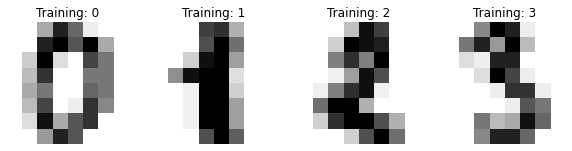

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

Construisons notre premier modèle.

In [ ]:
class Memorize(object):
    def __init__(self, X, y):
        self.X, self.y = X, y
        
    def predict(self, X):
        y = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            memorized = False
            for j in range(self.X.shape[0]):
                if (self.X[j] == X[i]).sum() == X.shape[1]:
                    y[i] = self.y[j]
                    memorized = True
                    break
            if not memorized:
                y[i] = np.random.randint(0, 10)
        return y

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [ ]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

Les données de test nous permettront de tester notre modèle sur des données qu'il n'a pas utilisé pour se construire.

In [ ]:
model = Memorize(X_train, y_train)

On commence par tester les performances de notre modèle sur notre jeu d'apprentissage.

In [ ]:
predicted = model.predict(X_train)

In [ ]:
print(f'Classification report for classifier Memorize on train:\n'
      f'{metrics.classification_report(y_train, predicted)}\n')

Notre modèle est parfait ! Aucune erreur. On ne peut pas faire mieux ! Et du côté du test ?

In [ ]:
predicted = model.predict(X_test)

In [ ]:
print(f'Classification report for classifier Memorize on test:\n'
      f'{metrics.classification_report(y_test, predicted)}\n')

C'est ridiculement mauvais : on se trompe une fois sur dix, soit exactement ce qu'on attendrait d'une réponse aléatoire.

Oui mais on a fait exprès de construire le modèle de cette manière ! En réalité, il existe une infinité fonction, paramétriques ou non, qu'on peut rendre aussi bonne qu'on veut sur nos données mais qui seraient particulièrement mauvaises sur de nouvelles données (cela inclut les modèles usuels et c'est pour cela qu'on a besoin d'experts !)... Toute la difficulté du *machine learner* va être de contrôler cela.

## III. Une autre première approche logique : le KNN (AS)

Intuitivement, on a envie de dire que nos données ne sont pas complètement déstructurées. Deux clients très similaires achèteront très probablement des produits très similaires. Un trois ressemble plus à un trois qu'à un cinq et un cinq ressemble plus à un cinq qu'à un trois. Finalement, on généralise un petit peu l'exemple précédent. Au lieu de répondre aléatoirement si je ne connais pas la donnée, je cherche l'exemple le plus proche et je prédis le même label ! Plus rigoureusement, notre modèle de prédiction fonctionne comme suit : 

$$\hat{y}_\text{new}=y\text{ avec }(x, y)=\text{argmin}_{(x, y)\in S}\lVert x-x_{\text{new}}\rVert_2.$$

On peut imaginer que si plusieurs points sont équidistants, la réponse se fait aléatoirement entre les labels possibles. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

---
<span style="color:blue">**Exercice :**</span> **Utilisez l'objet $\texttt{KNeighborsClassifier}$ avec le paramètre $\texttt{n}\_\texttt{neighbors=1}$ et entraînez le sur $\texttt{X}\_\texttt{train}$.**

---

In [ ]:
####### Complete this part ######## or die ####################
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
###############################################################

On teste maintenant sur le jeu de train pour avoir une idée des performances de notre modèle sur ce dernier.

In [ ]:
predicted = model.predict(X_train)

In [ ]:
print(f'Classification report for classifier {model} on train:\n'
      f'{metrics.classification_report(y_train, predicted)}\n')

On est toujours aussi bon sur le jeu d'apprentissage ! Cependant, c'est attendu car l'image qui ressemble le plus à une autre est l'image elle-même. Prédisons maintenant sur le test.

In [ ]:
predicted = model.predict(X_test)

In [ ]:
print(f'Classification report for classifier {model} on test:\n'
      f'{metrics.classification_report(y_test, predicted)}\n')

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
disp = metrics.plot_confusion_matrix(model, X_test, y_test, ax=ax)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

Is Machine learning solved ? Minute papillon ! Ce modèle est très sensible au bruit ! Supposons qu'une de nos données soient bruitées (e.g. un 3 qui ressemble à un 8). Si une nouvelle donnée représentant un $8$ se retrouve à côté de cette anomalie, elle sera mal prédite. Nous pouvons adresser cette limite de la manière suivante : au lieu de regarder le point le plus proche, on regarde les $k$ points les plus proches et on fait un vote à la majorité. Plus formellement la prédiction est faite comme suit :

$$\hat{y}_\text{new}=\text{majority$\_$voting}(\texttt{KNN}.\texttt{labels})\text{ où }\texttt{KNN}=\text{argmin}_{S^\prime\subset S,\ |S^\prime|=K}\sum_i \lVert x_i- x_{\text{new}}\rVert.$$

Dans le cas où on chercherait à faire une régression, on remplace le vote à la majorité par une moyenne.

Récupérons le jeu de données $\texttt{iris}$.

In [ ]:
iris = datasets.load_iris()
# décommentez la ligne suivante pour obtenir des informations
# sur le dataset iris.
# print(iris.DESCR)

De la même manière que précédemment, on construit notre jeu d'apprentissage pour construire notre modèle et notre jeu de test pour en tester les performances.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.5, shuffle=True
)

---
<span style="color:blue">**Exercice :**</span> **Utilisez l'objet $\texttt{KNeighborsClassifier}$ avec le paramètre $\texttt{n}\_\texttt{neighbors=1}$ et entraînez le sur $\texttt{X}\_\texttt{train}$. Faites une prédiction sur $\texttt{predicted=X}\_\texttt{test}$.**

---

In [ ]:
####### Complete this part ######## or die ####################
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

predicted = model.predict(X_test)
###############################################################

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
disp = metrics.plot_confusion_matrix(model, X_test, y_test, ax=ax)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

Les performances sont déjà très bonnes ! Mais il est possible de gagner un tout petit peu de performances en considérant plus de voisins :

---
<span style="color:blue">**Exercice :**</span> **Utilisez l'objet $\texttt{KNeighborsClassifier}$ avec le paramètre $\texttt{n}\_\texttt{neighbors=10}$ et entraînez le sur $\texttt{X}\_\texttt{train}$. Faites une prédiction sur $\texttt{predicted=X}\_\texttt{test}$.**

---

In [ ]:
####### Complete this part ######## or die ####################
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

predicted = model.predict(X_test)
###############################################################

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
disp = metrics.plot_confusion_matrix(model, X_test, y_test, ax=ax)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

## IV. Les arbres de décision ou Classification and regression Tree (CART) (AS)

De la même manière que pour l'algorithme KNN, on supposera ici que nos données admettent une certaine structure et que des points proches possèdent probablement le même label ou une prediction proche dans le cas de la régression. Ici, à la différence du KNN, la notion de voisinage se construit au travers d'hyperrectangles parallèles aux axes. Afin de bien comprendre le fonctionnement, supposons que notre arbre de décision soit déjà construit. Prenons une nouvelle données $x_{\text{new}}=[3, 5]^T$ et partons de la racine de notre arbre. Cette racine possède deux branches sortantes. Le choix de la branche se fait à partir d'un seuil (paramètre associé au noeud racine) et d'une coordonnée de notre $x$. Dans notre exemple imaginons que le seuil soit $7$ et que la coordonnée à regarder soit $x_{\text{new}}^{(1)}=5$. C'est clairement inférieur à $7$ et nous partons donc la branche de gauche de notre arbre. Nous somme sur un nouveau noeud associé à un nouveau seuil et une nouvelle coordonnée de notre donnée. On répète cette opération jusqu'à ce qu'on arrive aux feuilles de notre arbre. Chaque feuille regroupe les données du jeu d'apprentissage qui y aboutisse lorsqu'on les classe. Le choix du label se fait par un vote à la majorité sur ces données ou en moyennant. L'image suivante illustre cette idée :

![Decision tree](https://miro.medium.com/max/360/1*XMId5sJqPtm8-RIwVVz2tg.png)



Le choix de la règle de décision à chaque noeud peut être adapter afin d'obtenir des régions à la géométrie variable. La construction d'un arbre se fait en partant de la racine vers les feuilles et en choisissant intérativement les variables explicatives qui ont le plus d'effet sur notre prédiction (via diverses critères).

In [ ]:
from sklearn.tree import DecisionTreeClassifier

---
<span style="color:blue">**Exercice :**</span> **Utilisez l'objet $\texttt{DecisionTreeClassifier}$ avec le paramètre $\texttt{n}\_\texttt{max}\_\texttt{depth=10}$ et entraînez le sur $\texttt{X}\_\texttt{train}$. Faites une prédiction sur $\texttt{predicted=X}\_\texttt{test}$.**

---

In [ ]:
####### Complete this part ######## or die ####################
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)

predicted = model.predict(X_test)
###############################################################

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
disp = metrics.plot_confusion_matrix(model, X_test, y_test, ax=ax)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

## V. Les forêts aléatoires ou Random Forest (RF) (AS)

Les arbres de décision peuvent être sujets au surapprentissage. Une manière de compenser le problème est d'en construire plusieurs où chaque arbre est construit en ne voyant qu'une partie des données. Enfin leurs prédictions sont aggrégées. Ces approches sont généralement beaucoup plus performantes que les arbres simples. Malheureusement, autant avec un arbre simple on pouvait essayer de comprendre la prédiction, autant ici, cela devient difficile.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

---
<span style="color:blue">**Exercice :**</span> **Utilisez l'objet $\texttt{RandomForestClassifier}$ et entraînez le sur $\texttt{X}\_\texttt{train}$. Faites une prédiction sur $\texttt{predicted=X}\_\texttt{test}$.**

---

In [ ]:
####### Complete this part ######## or die ####################
model = RandomForestClassifier()
model.fit(X_train, y_train)

predicted = model.predict(X_test)
###############################################################

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
disp = metrics.plot_confusion_matrix(model, X_test, y_test, ax=ax)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

## VI. Choix des hyperparamètres (AS)

Nous avons du, pour les modèles précédents, choisir différents paramètres qui affectaient les performances de notre modèle. Nous les avons choisi en regardant les performances de notre modèle sur le jeu de test. Cependant, les bonnes performances étaient peut-être un coup de chance !

Il existe deux stratégies d'évaluation sans biais de la qualité de notre modèle :
* La validation non croisée où une partie de notre jeu de donnée est cachée pendant l'apprentissage puis utilisée afin d'évaluer les performances du modèle. Il s'agit du découpage train/test. Cette stratégie est un estimateur sans biais de la qualité de notre modèle mais possède une variance plus forte que la validation croisée. Elle peut-être particulièrement utile lorsque le coup d'apprentissage d'un modèle est très élevé (e.g. *deep learning*)
* La validation croisée où notre jeu de données est divisé en *k* parties (on parle aussi de *k-fold*). Évidemment, $k\in\{2, ..., n\}$ où $n$ est la taille du jeu de données. Chacune des parties jouera successivement le rôle de jeu de test pendant que les $k-1$ autres parties serviront à calculer notre modèle. Le résultat de cette procédure est un vecteur de $k$ scores dont on peut calculer la moyenne, la variance, etc.

On peut illustrer la méthode des *k-folds* via l'exemple suivant :

\begin{align}
\text{Appartient au train set: } \color{red}{\boxed{}}&\text{ et appartient au test set: }\color{green}{\boxed{}}
\end{align}
\begin{align}
\text{Step 1: }\color{green}{\boxed{}}\color{red}{\boxed{}}&\color{red}{\boxed{}}\color{red}{\boxed{}}\color{red}{\boxed{}}\color{red}{\boxed{}}\color{red}{\boxed{}}
\end{align}
\begin{align}
\text{Step 2: }\color{red}{\boxed{}}\color{green}{\boxed{}}&\color{red}{\boxed{}}\color{red}{\boxed{}}\color{red}{\boxed{}}\color{red}{\boxed{}}\color{red}{\boxed{}}
\end{align}
\begin{align}
\text{Step 3: }\color{red}{\boxed{}}\color{red}{\boxed{}}&\color{green}{\boxed{}}\color{red}{\boxed{}}\color{red}{\boxed{}}\color{red}{\boxed{}}\color{red}{\boxed{}}
\end{align}
\begin{align}
\text{Step 4: }\color{red}{\boxed{}}\color{red}{\boxed{}}&\color{red}{\boxed{}}\color{green}{\boxed{}}\color{red}{\boxed{}}\color{red}{\boxed{}}\color{red}{\boxed{}}
\end{align}
\begin{align}
\text{Step 5: }\color{red}{\boxed{}}\color{red}{\boxed{}}&\color{red}{\boxed{}}\color{red}{\boxed{}}\color{green}{\boxed{}}\color{red}{\boxed{}}\color{red}{\boxed{}}
\end{align}
\begin{align}
\text{Step 6: }\color{red}{\boxed{}}\color{red}{\boxed{}}&\color{red}{\boxed{}}\color{red}{\boxed{}}\color{red}{\boxed{}}\color{green}{\boxed{}}\color{red}{\boxed{}}
\end{align}
\begin{align}
\text{Step 7: }\color{red}{\boxed{}}\color{red}{\boxed{}}&\color{red}{\boxed{}}\color{red}{\boxed{}}\color{red}{\boxed{}}\color{red}{\boxed{}}\color{green}{\boxed{}}
\end{align}

La méthode $\texttt{cross_val_score}$ de $\texttt{sklearn}$ permet de réaliser cette procédure. On pourra renseigner le paramètre $\texttt{cv}$ qui indique le nombre $k$ et le paramètre $\texttt{scoring}$ qui donne la métrique que l'on souhaite calculer.

Si on cherche à trouver une valeur d'un paramètre, l'objet $\texttt{GridSearchCV}$ applique une validation croisée en cherchant différentes valeurs d'un paramètres.


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'max_depth': [2, 3, 4, 5, 10, None]
}

---
<span style="color:blue">**Exercice :**</span> **Utilisez l'objet $\texttt{GridSearchCV}$ pour faire une recherche par grille sur le modèle $\texttt{RandomForestClassifier}$ et entraînez le sur $\texttt{X}\_\texttt{train}$.**

---

In [ ]:
####### Complete this part ######## or die ####################
model = GridSearchCV(RandomForestClassifier(), params)
model.fit(X_train, y_train)
###############################################################

In [ ]:
predicted = model.predict(X_test)

fig, ax = plt.subplots(figsize=(12, 8))
disp = metrics.plot_confusion_matrix(model, X_test, y_test, ax=ax)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

Notre RandomForest de base était déjà très bon !

## VII. L'algorithme des K-Moyennes (ANS)

Il s'agit ici d'un algorithme non supervisé. Imaginons que nous ayons un collecté un jeu de données $S_n=\{(X_i)\}_{i\leq n}$. On sait qu'il existe des groupes dans nos données. Supposons même qu'on sâche qu'il existe $K$ groupes. L'idée de l'algorithme des K-Moyennes va être de détecter ces $K$ groupes en trouvant une solution au problème d'optimisation suivant : 

$$\text{KMeans}=\text{argmin}_{m_1, \ldots, m_K\in\mathcal{X}, c_1,\ldots,c_n\in\{1,\ldots,K\}}\sum_{i=1}^K\sum_{j=1}^n\textbf{1}\{c_1=i\}\lVert m_i-x_j\rVert_2=\text{argmin}_{m_1, \ldots, m_K\in\mathcal{X}, c_1,\ldots,c_n\in\{1,\ldots,K\}}\sum_{j=1}^n\lVert x_j-m_{c_j}\rVert_2.$$

Dit autrement, chaque groupe est représentée par une coordonnée $c_i$ (qui s'avère être la moyenne des éléments du groupe) et chaque élément de notre jeu de données n'est associé qu'à un seul groupe. L'objectif va être que leur distance quadratique au centre de leur groupe doit être minimale !

Considérons le jeu de données suivant.

In [79]:
import numpy as np

def sample_data(n):
    means = np.array([[-0.5, 0.5], [1, 1], [0.5, -0.5]])
    cov = np.diag([1, 1])/15
    X = np.concatenate([
        np.random.multivariate_normal(m, cov, size=n) for m in means
    ], axis=0)
    y = [i//n for i in range(3*n)]
    return X, y
    
X, y = sample_data(10)

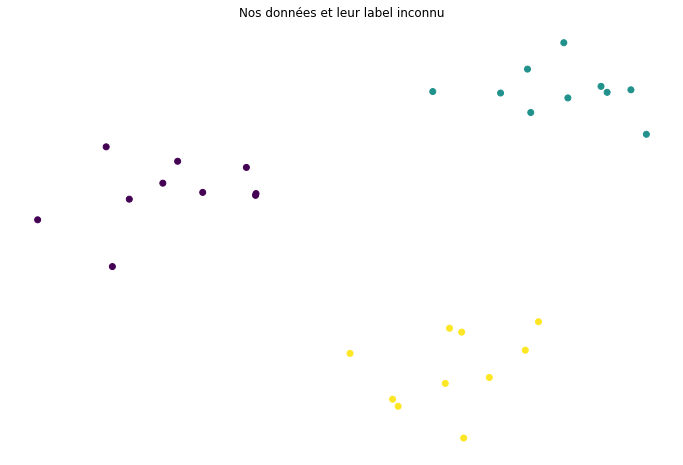

In [118]:
import matplotlib.pyplot as plt
def plot_clusters(X, c, means=None, path=None):
    plt.figure(figsize=(12, 8))
    plt.axis('off')
    plt.scatter(X[:, 0], X[:, 1], c=c)
    plt.title('Nos données et leur label inconnu')
    if means is not None:
        for m in means:
            plt.scatter([m[0]], [m[1]], s=55, color='red')
    if path is not None:
        for p in path:
            plt.plot(p[:, 0], p[:, 1], color='red')
    plt.show()
plot_clusters(X, y)

Le problème de K-Means est NP-Difficile. Pour cela, nous utilisons en pratique un heuristique appelé "algorithme de LLoyd" qui fonctionnde la manière suivante :

1.  On initialise les k moyennes
2.  On assigne tous nos points à leur moyenne la plus proche
3.  On met à jour les moyennes avec les nouveaux points
4.  Si le déplacement des moyennes est significatif, on reprend à l'étape 2

---
<span style="color:blue">**Exercice :**</span> **Le problème est NP-Difficile et un algorithme permettant de le résoudre est l'algorithme de LLoyd. Implémentez le.**

---

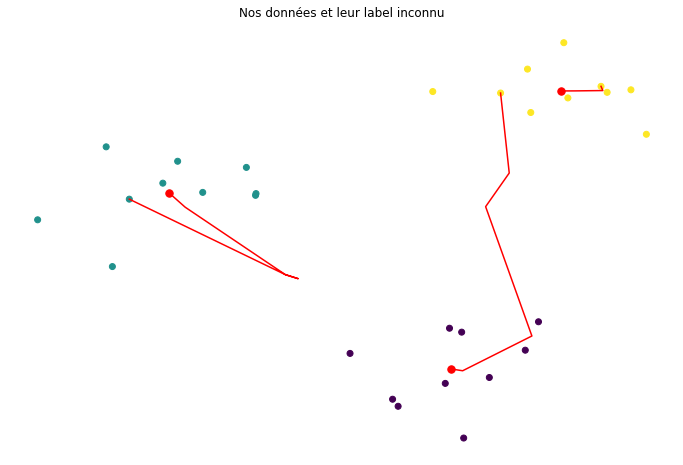

In [129]:
class KMeans(object):
    def __init__(self, k=3, epsilon=0.001):
        self.k = k
        self.epsilon = epsilon
    
    def fit(self, X):
        ####### Complete this part ######## or die ####################
        # K means initialization
        X_ = X.copy()
        np.random.shuffle(X_)
        means = X_[:self.k]
        
        variation = float('inf')
        
        assignment = [0 for _ in range(len(X))]
        
        path = [means.copy()]
        
        while variation > self.epsilon:
            # Step 1

            for i in range(len(X)):
                closest = 0
                closest_dist = np.linalg.norm(X[i]-means[0])

                for k in range(1, self.k):
                    dist = np.linalg.norm(X[i]-means[k])
                    if dist  < closest_dist:
                        closest_dist = dist
                        closest = k

                assignment[i] = closest

            # Step 2
            kmeans = {
                k : [] for k in range(self.k)
            }
            for i in range(len(X)):
                kmeans[assignment[i]].append(X[i])

            variation = -float('inf')

            for k in range(self.k):

                new_mean = np.mean(kmeans[k], axis=0)


                if np.linalg.norm(new_mean-means[k]) > variation:
                    variation = np.linalg.norm(new_mean-means[k])
                means[k] = new_mean
            path.append(means.copy())
        path = np.array(path).transpose(1, 0, 2)
        ###############################################################
        return assignment, means, path
            

model = KMeans(3)
plot_clusters(X, *model.fit(X))

On se rend compte qu'on arrive à retrouver les 3 groupes automatiquement (Les couleurs sont celles calculées par notre modèle des K-Moyennes) !

## VIII. La malédiction de la dimension

Nous avons pu observer des scénarios où l'erreur sur notre jeu de données d'apprentissage était $0$ alors que notre modèle n'était pas si bon que cela sur notre jeu de test. Cet écart peut même devenir catastrophique ! De manière plus rigoureuse, le gap de généralisation de notre estimateur $\hat{h}$ est la quantité suivante :

\begin{equation}
\text{gap}(\hat{h})=|Re(\hat{h})-R(\hat{h})|.
\end{equation}

Où $Re$ fait référence à notre risque empirique, c'est-à-dire l'erreur sur le jeu d'apprentissage et $R$ à l'erreur en espérance.

Il est possible d'avoir une idée de $R(\hat{h})$ en passant par un jeu de test ou par une autre stratégie d'évaluation via un jeu de test par exemple, comme nous avons pu le voir.


Deux facteurs principaux sont admis comme entrant en jeu dans $\text{gap}(\hat{h})$ : 
* la taille de l'ensemble $\mathcal{H}$ qui est généralement liée au nombre de paramètres de notre modèle,
* la taille du jeu de données $\mathcal{S}$.

Plus $\mathcal{H}$ est grand, plus on s'attend à voir l'erreur augmenter. L'effet de double descente montre qu'avec un choix réfléchi de paramétrisation, cette tendance n'est pas nécessairement monotone. De la même manière, augmenter la taille du jeu de données $\mathcal{S}$ permet de réduire l'erreur de généralisation.

La taille de $\mathcal{H}$ est intrinsèquement liée au nombre de paramètres qui lui-même dépend très souvent de la dimension $d$ de nos données.

Nous allons ici nous rendre compte que les modèles qui regardent le voisinage de nos données souffre d'une grosse limite liée à ce qu'on appelle *la malédiction de la dimension*.

### En détails

La malédiction de la dimension fait référence aux résultats contre-intuitifs qui apparaissent lorsque la dimension augmente. Une première manière de l'observer est possible grâce au KNN. Ce dernier classe un nouvel élément en fonction de ses voisins dans le jeu d'apprentissage. Nous allons en particulier étudier l'évolution du risque de généralisation en fonction de la dimension. Plus précisément, les données synthétiques sont construites de la manière suivante :

In [ ]:
import numpy as np
def sample_data(n, k=3, d=3, mu=1):
    y = np.random.randint(0, 2, size=(n, 1))
    
    X = np.random.normal(mu, 1, size=(n, k))
    X = y*X-(1-y)*X # positive have mean mu and negative, -mu
    noise = np.random.normal(0, 1, size=(n, d-k))
    X = np.concatenate([X, noise], axis=1)
    
    return X, y

Dit autrement, $k$ dimensions contiennent le signal intéressant pour notre tâche et $d$ dimensions ne servent à rien. Nous observons ci-dessous ce qui se passe lorsqu'on rajouter des dimensions de bruits (i.e. qui ne servent à rien). C'est typiquement ce pourrait se passer avec des images. Une photo de chien ne contient pas que des pixels descriptifs du concept de chien.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

scores = []
redo = 5
max_dim = 5000
first_dim = 10
steps = 100

for d in range(first_dim, max_dim, steps):
    s = 0
    for _ in range(redo):
        X, y = sample_data(100, d=d)
        X_test, y_test = sample_data(200, d=d)
        c = KNeighborsClassifier()
        c.fit(X, y.reshape((y.shape[0],)))
        s += c.score(X_test, y_test.reshape((y_test.shape[0],)))/redo
    scores.append(s)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

# configuration generale de matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
plt.style.use('ggplot')

plt.plot(list(range(first_dim, max_dim, steps)), scores)
plt.title('Evolution de l\'erreur en fonction de la dimension du probleme')
plt.show()

---

<span style="color:blue">**Exercice 1 :**</span> **Quelle est le risque de généralisation pour l'erreur 0/1 (1 si la classe est mal prédite, 0 sinon) d'un classifieur aléatoire ?**

<span style="color:green">**Réponse :**</span>

<span style="color:blue">**Exercice 2 :**</span> **Expliquez pourquoi l'erreur de généralisation diminue lorsqu'on rajoute des dimensions sans signal.**

<span style="color:green">**Réponse :**</span>

---

De manière similaire, affichons ci-dessous l'évolution des distances entre nos points en fonction de la dimension du problème.

In [ ]:
import numpy as np

def sample_data(n, d):
    return np.random.uniform(-1, 1, size=(n, d))/np.sqrt(d)
X = sample_data(100, 10)

In [ ]:
redo = 50
def experiment_(d):
    min_ = 0
    max_ = 0
    mean_ = 0
    for _ in range(redo):
        X = sample_data(100, d)
        vec = np.sqrt((X**2).sum(axis=1))
        min_ += vec.min()/redo
        max_ += vec.max()/redo
        mean_ += vec.mean()/redo
    return min_, max_, mean_
idx = []
val = []
for d in range(10, 1000, 100):
    idx.append([d])
    val.append(experiment_(d))
for d in range(2000, 10000, 1000):
    idx.append([d])
    val.append(experiment_(d))
arr = np.concatenate([np.array(idx), np.array(val)], axis=1)

In [ ]:
plt.figure()
plt.plot(arr[:, 0], arr[:, 1], label='Min')
plt.plot(arr[:, 0], arr[:, 2], label='Max')
plt.plot(arr[:, 0], arr[:, 3], label='Moy')
plt.legend()
plt.title('Evolution des distances en fonction de la dimension du probleme')
plt.xscale('log')

---
<span style="color:blue">**Exercice :**</span> **Quelle phénomène mathématique pouvons nous invoquer afin d'expliquer ce phénomène ?**

<span style="color:green">**Réponse :**</span>

---

Soit $x_\text{new}$ une nouvelle donnée. Une petite perturbation du point de notre jeu d'apprentissage le plus différent de $x_\text{new}$ peut le transformer en le point le plus proche est inversement... C'est une grosse limite des modèles précédents. Il faut soit réfléchir à réduire la dimension, soit injecter de la connaissance dans nos modèles, etc.